In [26]:
!pip install pydot

In [38]:
!pip install numpy matplotlib scipy opencv-python scikit-image

     ---------------------------------------- 15.8/15.8 MB 9.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tensorflow-intel 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.26.4 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.26.4 which is incompatible.


In [40]:
!pip install deepface

  Using cached numpy-1.23.5-cp310-cp310-win_amd64.whl (14.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.


In [59]:
!pip uninstall opencv-python opencv-contrib-python
!pip install opencv-python

^C


In [57]:
!pip install graphviz

In [58]:
!pip install --upgrade numpy h5py tensorflow

  Using cached numpy-2.2.4-cp310-cp310-win_amd64.whl (12.9 MB)
  Using cached h5py-3.13.0-cp310-cp310-win_amd64.whl (3.0 MB)
  Using cached tensorflow-2.19.0-cp310-cp310-win_amd64.whl (375.7 MB)
  Using cached keras-3.9.2-py3-none-any.whl (1.3 MB)
  Using cached numpy-2.1.3-cp310-cp310-win_amd64.whl (12.9 MB)
  Using cached tensorboard-2.19.0-py3-none-any.whl (5.5 MB)
  Using cached ml_dtypes-0.5.1-cp310-cp310-win_amd64.whl (209 kB)
  Using cached rich-14.0.0-py3-none-any.whl (243 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl (87 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl (10.0 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.3
    Uninstalling tensorboard-2.12.3:
      Successfully uninstalled tensorboard-2.12.3
  Attempting uninstall: ml-dtypes
    Found existing installation: ml

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Zainab\\anaconda3\\Lib\\site-packages\\tensorflow\\compiler\\tf2tensorrt\\_pywrap_py_utils.pyd'
Consider using the `--user` option or check the permissions.



In [48]:
## RUN BELOW CODES FOR RECEIVING THE OUTPUT

In [62]:
#### WORKING CODE FOR EMOTION DETECTION

import cv2
from deepface import DeepFace
import time # Optional: To slightly slow down if DeepFace errors due to speed

# Load OpenCV's pre-trained face detection model
# Ensure the path is correct or downloaded if needed
haar_path = cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
try:
    face_cascade = cv2.CascadeClassifier(haar_path)
    if face_cascade.empty():
        raise IOError(f"Cannot load HAAR cascade from {haar_path}")
except Exception as e:
    print(f"Error loading cascade classifier: {e}")
    exit()

# --- IMPORTANT: Select the correct camera index ---
# 0 is usually the built-in webcam, 1 might be an external one.
# Try changing this if you don't see the expected camera feed.
CAMERA_INDEX = 1
cap = cv2.VideoCapture(CAMERA_INDEX)

if not cap.isOpened():
    print(f"Error: Could not open video capture device with index {CAMERA_INDEX}")
    exit()

print("Camera opened successfully.")
print("Press 'q' to exit.")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Failed to capture frame.")
        time.sleep(0.5) # Pause briefly before trying again or breaking
        # break # Uncomment this if you want to exit on first failure
        continue # Try to capture next frame

    # --- Process the ORIGINAL frame ---
    # Convert frame to grayscale for better face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces using the original frame's orientation
    # (You might need to tune scaleFactor and minNeighbors for your lighting/camera)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(50, 50))

    # Store the detected emotions and their positions
    detected_emotions = []

    # --- Perform analysis and draw on the ORIGINAL frame ---
    for (x, y, w, h) in faces:
        # Draw bounding box around the face (on the original orientation frame)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Extract face region for emotion analysis (from the original orientation frame)
        # Add a small buffer if needed, but be careful not to go out of bounds
        face_roi = frame[y:y + h, x:x + w]

        # Ensure ROI is not empty before analyzing
        if face_roi.size == 0:
            print("Warning: Detected face ROI is empty.")
            continue

        try:
            # Analyze emotion using DeepFace on the original ROI
            # enforce_detection=False is important here as we already detected the face
            result = DeepFace.analyze(face_roi, actions=['emotion'], enforce_detection=False, silent=True) # silent=True reduces console spam

            if result and isinstance(result, list): # Check if result is valid
                emotion = result[0]['dominant_emotion']
                # Store the emotion and its position
                detected_emotions.append((emotion, x, y))
            else:
                print("Warning: DeepFace did not return expected result format.")

        except ValueError as ve:
             # This often happens if the detected face is too small or unclear for DeepFace
             print(f"DeepFace ValueError (likely face unsuitable): {ve}")
             # Optionally draw a '?' or nothing
             detected_emotions.append(("?", x, y))
        except Exception as e:
            print(f"Error during DeepFace analysis: {e}")
            # Optionally draw an error indicator
            detected_emotions.append(("Error", x, y))

    # --- Flip the frame HORIZONTALLY for display AFTER processing ---
    # flipCode = 1 means horizontal flip (mirror image)
    display_frame = cv2.flip(frame, 1)

    # Display the flipped emotion labels
    for emotion, x, y in detected_emotions:
        flipped_x = display_frame.shape[1] - x - w
        cv2.putText(display_frame, emotion, (flipped_x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

    # --- Show the FLIPPED video feed ---
    cv2.imshow("Real-Time Emotion Detection (Mirrored)", display_frame)

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        print("Exit key pressed.")
        break

# Release resources
print("Releasing camera and destroying windows...")
cap.release()
cv2.destroyAllWindows()
print("Application finished.")

Camera opened successfully.
Press 'q' to exit.
Exit key pressed.
Releasing camera and destroying windows...
Application finished.


In [31]:
# Code for CNN Model and model summary
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_7 (Dense)             (None, 128)              

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data preparation
train_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory('C://Users//Zainab//emotion_detection//dataset//training_set//train',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

Found 1593 images belonging to 2 classes.


Epoch 1/25
50/50 [==============================] - 18s 332ms/step - loss: 0.0202 - accuracy: 0.9799 - val_loss: 2.1886e-11 - val_accuracy: 1.0000
Epoch 2/25
50/50 [==============================] - 15s 303ms/step - loss: 1.7312e-11 - accuracy: 1.0000 - val_loss: 1.5989e-11 - val_accuracy: 1.0000
Epoch 3/25
50/50 [==============================] - 23s 457ms/step - loss: 1.5956e-11 - accuracy: 1.0000 - val_loss: 1.5954e-11 - val_accuracy: 1.0000
Epoch 4/25
50/50 [==============================] - 17s 338ms/step - loss: 1.5953e-11 - accuracy: 1.0000 - val_loss: 1.5953e-11 - val_accuracy: 1.0000
Epoch 5/25
50/50 [==============================] - 15s 307ms/step - loss: 1.5953e-11 - accuracy: 1.0000 - val_loss: 1.5953e-11 - val_accuracy: 1.0000
Epoch 6/25
50/50 [==============================] - 14s 290ms/step - loss: 1.5953e-11 - accuracy: 1.0000 - val_loss: 1.5953e-11 - val_accuracy: 1.0000
Epoch 7/25
50/50 [==============================] - 15s 299ms/step - loss: 1.5953e-11 - accuracy: 

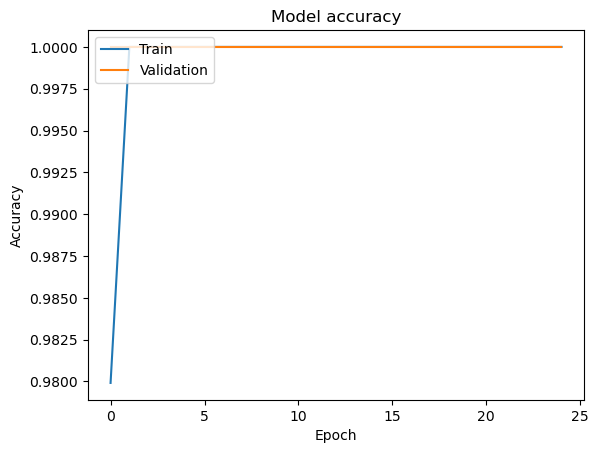

In [33]:
import matplotlib.pyplot as plt

# Calculate steps_per_epoch
steps_per_epoch = len(training_set)

# Training the model
history = model.fit(training_set,
                    steps_per_epoch=steps_per_epoch,
                    epochs=25,
                    validation_data=training_set,
                    validation_steps=len(training_set))

# Plotting accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [43]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_data_dir = 'C://Users//Zainab//emotion_detection//dataset//training_set'
validation_data_dir = 'C://Users//Zainab//emotion_detection//dataset//csv//valid'

# ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
training_set = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

# Load validation data
validation_set = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

# Check the class indices
print(training_set.class_indices)

Found 1826 images belonging to 3 classes.
Found 0 images belonging to 0 classes.
{'test': 0, 'train': 1, 'valid': 2}


In [61]:
# Displaying training and validation accuracy
train_acc = history.history['accuracy'][-1] * 100
val_acc = history.history['val_accuracy'][-1] * 100

print(f'Training Accuracy: {train_acc:.2f}%')
print(f'Validation Accuracy: {val_acc:.2f}%')

Training Accuracy: 100.00%
Validation Accuracy: 100.00%
